<a href="https://colab.research.google.com/github/andrea0026/food_data_practice/blob/main/food_supply_chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


"When the country began closing up in the face of the Covid-19 pandemic last March, it was clear that keeping food supply chains from breaking down was going to be a big challenge. Shortages of meat, fresh fruit and vegetables and other foodstuffs were feared and in many cases came to pass..."
ByJustin Fox
24 de febrero de 2021, 7:00 GMT-5
Data from https://www.makeovermonday.co.uk/data/data-sets-2021/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
filename = '/content/drive/MyDrive/Data_science/archivos/Personal Consumption Expenditures.xlsx'
df = pd.read_excel(filename)
df.head()

,Category,Sub-Category,Month,Millions of Dollars
0,Alcoholic beverages,Beer,1976-01-01,9908
1,Alcoholic beverages,Beer,1976-02-01,9994
2,Alcoholic beverages,Beer,1976-03-01,10127
3,Alcoholic beverages,Beer,1976-04-01,10204
4,Alcoholic beverages,Beer,1976-05-01,10233


In [ ]:
df.nunique()

Category                  11
Sub-Category              20
Month                    745
Millions of Dollars    12136
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Category             14900 non-null  object        
 1   Sub-Category         14900 non-null  object        
 2   Month                14900 non-null  datetime64[ns]
 3   Millions of Dollars  14900 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 465.8+ KB


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().sum()

Category               0
Sub-Category           0
Month                  0
Millions of Dollars    0
dtype: int64

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [5]:
dollars_category = df.groupby(['Category'])['Millions of Dollars'].nunique()
dollars_category

Category
Alcoholic beverages                                  2127
Cereals and bakery products                          1459
Coffee, tea, and other beverage materials             712
Fats and oils                                         696
Fish and seafood                                      700
Fresh fruits and vegetables                          1430
Meats and poultry                                    2833
Milk, dairy products, and eggs                       2081
Mineral waters, soft drinks, and vegetable juices     735
Processed fruits and vegetables                       725
Sugar and sweets                                      726
Name: Millions of Dollars, dtype: int64

In [6]:
uniqueCategory = list(dollars_category.index)
uniqueCategory

['Alcoholic beverages',
 'Cereals and bakery products',
 'Coffee, tea, and other beverage materials',
 'Fats and oils',
 'Fish and seafood',
 'Fresh fruits and vegetables',
 'Meats and poultry',
 'Milk, dairy products, and eggs',
 'Mineral waters, soft drinks, and vegetable juices',
 'Processed fruits and vegetables',
 'Sugar and sweets']

In [7]:
uniqueDollars = list(dollars_category.values)
uniqueDollars

[2127, 1459, 712, 696, 700, 1430, 2833, 2081, 735, 725, 726]

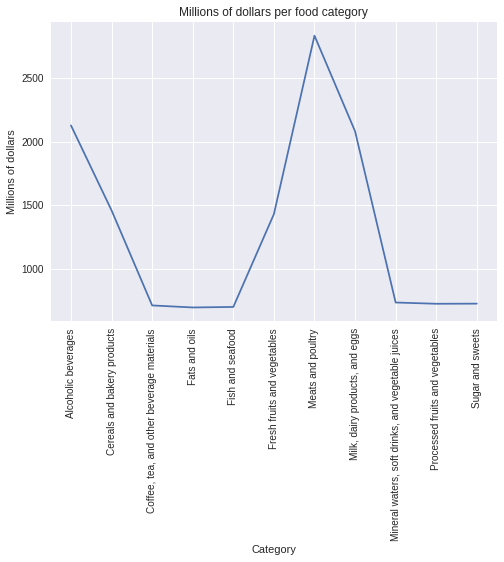

In [8]:
plt.style.use('seaborn')
plt.plot(uniqueCategory, uniqueDollars);
plt.xticks(rotation=90, horizontalalignment="center");
plt.xlabel('Category')
plt.ylabel('Millions of dollars')
plt.title('Millions of dollars per food category');

#Meats and poultry show greater movement in dollars

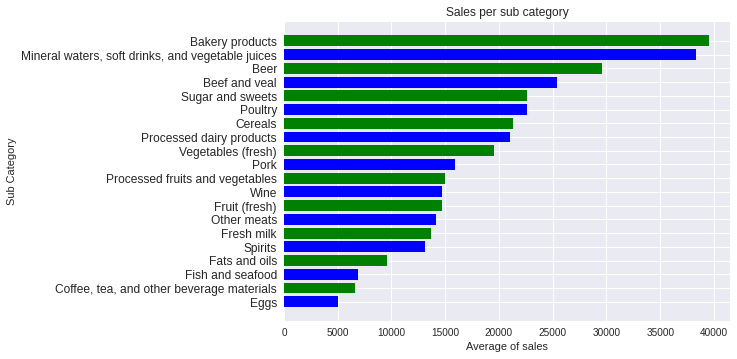

In [22]:
# The graph shows us which subcategory has the highest and lowest number of sales. 
sales_food = df.groupby('Sub-Category')['Millions of Dollars'].mean().reset_index(name='Avg Sales').sort_values(by=['Avg Sales'])
plt.barh(sales_food['Sub-Category'],sales_food['Avg Sales'],color = ['blue','green']),

plt.yticks(size =12)
plt.yticks(size =12)
plt.xlabel ('Average of sales')
plt.ylabel ('Sub Category')
plt.title ('Sales per sub category');

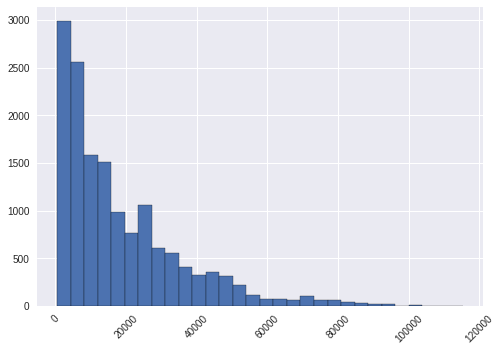

In [37]:
plt.style.use('seaborn')
df['Millions of Dollars'].hist(bins = 30, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')